In [1]:
%matplotlib inline

import importlib
import numpy as np
import pr_util as util

from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

from generate_global_features_2 import generate_global_features

importlib.reload(util)

<module 'pr_util' from '/Users/felipefelix/USP/tcc/code/pr_util.py'>

In [2]:
# Randomly select n species from dataset

n = 5
data_dirs = util.choose_species(n)

for dir in data_dirs:
    print(dir)
    

/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-2/Crypturellus noctivagus/
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-3/Pseudoleistes guirahuro/
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-4/Trichothraupis melanops/
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-3/Ramphastos dicolorus/
/Users/felipefelix/USP/tcc/dataset/pr_article/S_A_C_Base_Parte-1/Camptostoma obsoletum/


In [25]:
# Generate n_global global features from a selected feature 'feat_name', 
# each one defined by a function in 'functions'.

n_global = 4
feat_name = 'spec_roll'
functions = [np.mean, np.std, np.max, np.min]
song_or_call = 'song'

labels_dict, labels, data = generate_global_features(n_global, feat_name, data_dirs, song_or_call, functions)

print(labels_dict)
print(labels)
print(data[:5])

{'Pseudoleistes Guirahuro': 1, 'Ramphastos Dicolorus': 3, 'Camptostoma Obsoletum': 4, 'Crypturellus Noctivagus': 0, 'Trichothraupis Melanops': 2}
[0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
[[ 2122.84388388   845.5013821   7536.62109375   710.59570312]
 [ 6532.77726895   632.06791681  8118.01757812  3369.94628906]
 [ 5005.45349121   688.84821347  7062.890625    3176.14746094]
 [ 4179.91373698   396.44328047  5071.06933594     0.        ]
 [ 4635.90142278   542.00067583  6933.69140625  3843.67675781]]


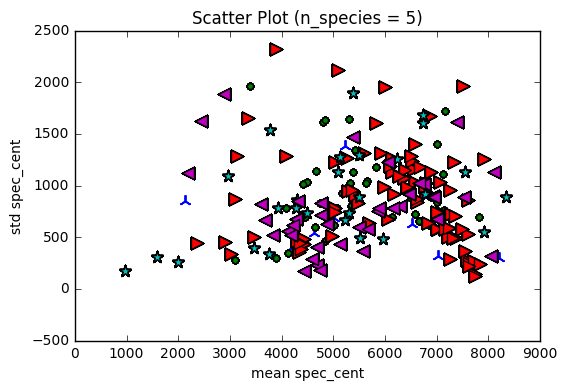

In [26]:
util.plot_scatter(data[:,0], data[:,1], labels, 'mean spec_cent', 'std spec_cent')

## kNN

In [28]:
util.kNN(data, labels, range(3,10), 5)

3-Neighbors | Accuracy: 0.35 (+/- 0.26) | Weight: uniform
3-Neighbors | Accuracy: 0.37 (+/- 0.26) | Weight: distance
4-Neighbors | Accuracy: 0.35 (+/- 0.23) | Weight: uniform
4-Neighbors | Accuracy: 0.37 (+/- 0.25) | Weight: distance
5-Neighbors | Accuracy: 0.38 (+/- 0.22) | Weight: uniform
5-Neighbors | Accuracy: 0.37 (+/- 0.24) | Weight: distance
6-Neighbors | Accuracy: 0.37 (+/- 0.25) | Weight: uniform
6-Neighbors | Accuracy: 0.37 (+/- 0.25) | Weight: distance
7-Neighbors | Accuracy: 0.38 (+/- 0.25) | Weight: uniform
7-Neighbors | Accuracy: 0.39 (+/- 0.27) | Weight: distance
8-Neighbors | Accuracy: 0.38 (+/- 0.23) | Weight: uniform
8-Neighbors | Accuracy: 0.39 (+/- 0.27) | Weight: distance
9-Neighbors | Accuracy: 0.37 (+/- 0.21) | Weight: uniform
9-Neighbors | Accuracy: 0.38 (+/- 0.24) | Weight: distance


## Naïve-Bayes

In [29]:
gnb = GaussianNB()
scores = cross_val_score(gnb, data, labels, cv = 5)
print('Accuracy: {0:.2f} (+/- {1:.2f})'.format(scores.mean(), scores.std() * 2))
print(scores)

Accuracy: 0.37 (+/- 0.15)
[ 0.42857143  0.42857143  0.36585366  0.225       0.40540541]


## SVM

In [30]:
clf = svm.SVC(kernel = 'linear', C = 1)
scores = cross_val_score(clf, data, labels, cv = 5)
print('Accuracy: {0:.2f} (+/- {1:.2f})'.format(scores.mean(), scores.std() * 2))
print(scores)

Accuracy: 0.47 (+/- 0.20)
[ 0.38095238  0.5         0.41463415  0.4         0.64864865]
